A continuação apresento a curva de luz normalizada com menor **rms** obtida com o polyfit (out_lc_from_p_ra_poli_g3_f1.dat), antes de aplicar a media deslizante.

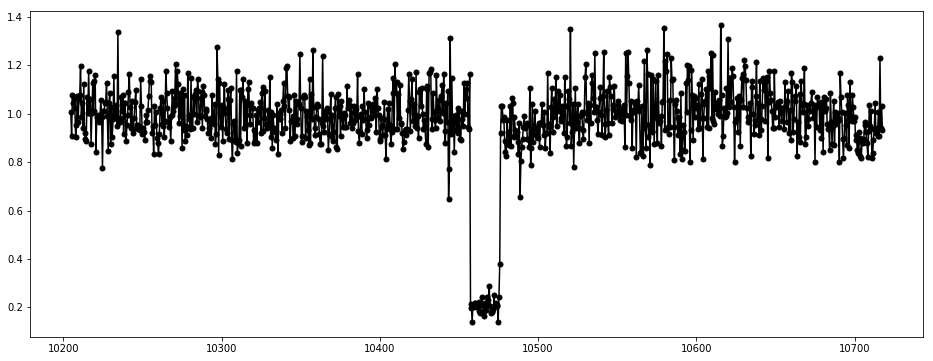

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_table('out_lc_from_p_ra_poli_g3_f1.dat',sep='\s+', header=None)
#df.describe() # mostra a estadistica das colunas
fig = plt.figure(figsize=(16,6))
plt.plot(df[0], df[1], 'ko-', color='black', markersize=5) 
# df[0]: tempo
# df[1]: fluxo
plt.show()

### Resultados de aplicar a media deslizante

O pandas de python permite aplicar a media deslizante com o seguinte comando. 

df[2] = df[1].rolling(window=2,center=False).mean()

Ele cria uma nova coluna df[2] com os valores da media deslizante. 

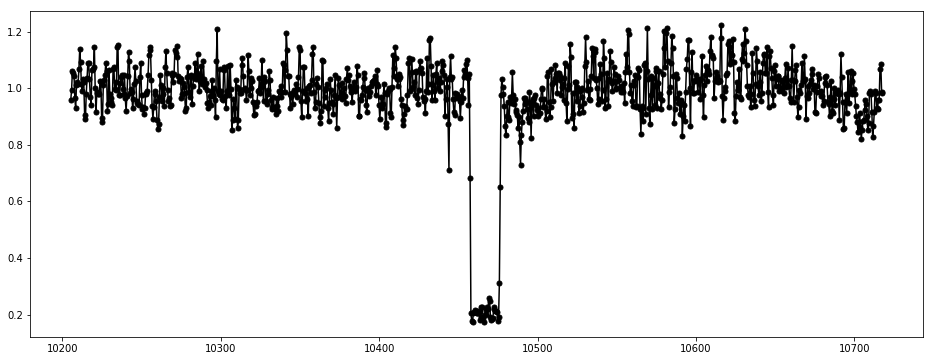

In [3]:
# tomando em comta dois pontos (windows = 2)
df[2] = df[1].rolling(window=2,center=False).mean()
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[2], 'ko-', color='black', markersize=5)
plt.show()

A continuação mostro a superposição da curva original e a curva obtida com a media deslizante para dois pontos

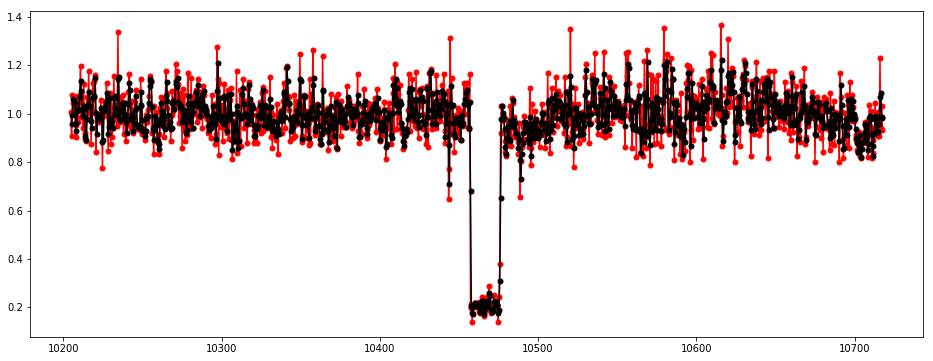

In [4]:
df[2] = df[1].rolling(window=2,center=False).mean()
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=5) # original
plt.plot(df[0], df[2], 'ko-', color='black', markersize=5)   # com media deslizante
plt.show()

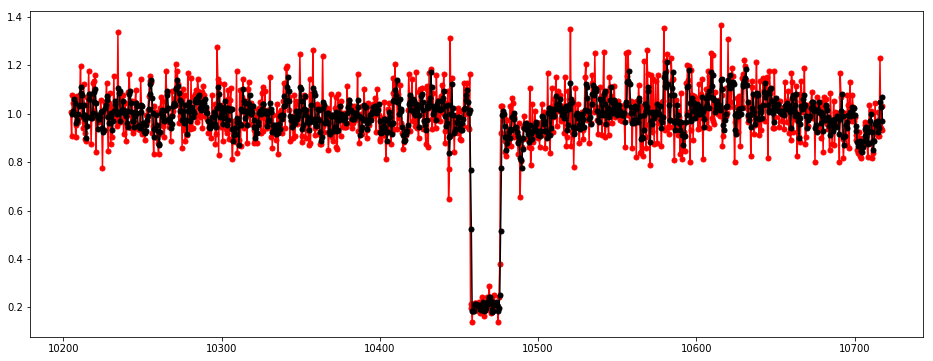

In [5]:
# tomando em comta treis pontos (windows = 3)
df[2] = df[1].rolling(window=3,center=False).mean()
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=5) # original
plt.plot(df[0], df[2], 'ko-', color='black', markersize=5) # media deslizante
plt.show()

Da figura pode-se ver que a media deslizante com treis pontos afeta a sinal do anel.

# Media deslizante para 5 pontos

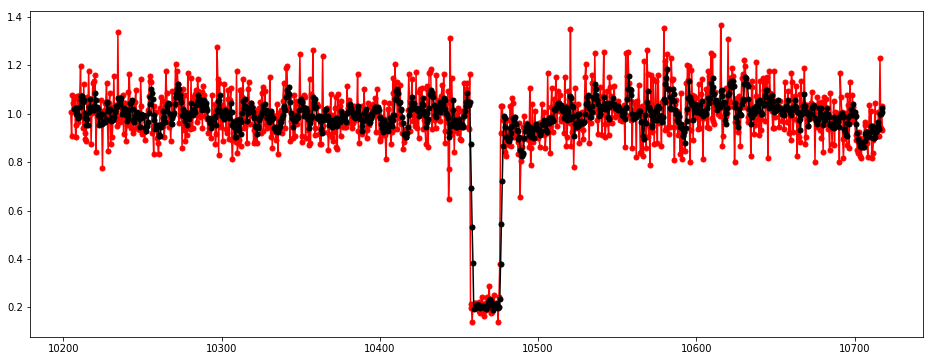

In [6]:
# tomando em comta treis pontos (windows = 5)
df[2] = df[1].rolling(window=5).mean()
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=5) # original
plt.plot(df[0], df[2], 'ko-', color='black', markersize=5) # media deslizante
plt.show()

Pode-se ver que para 5 pontos os aneis já não são percibidos

# Media deslizante com o peso do sigma

$$ \frac{(P1+P2)}{(2*\sigma)}= \frac{media}{\sigma}$$


0.031164023786491354


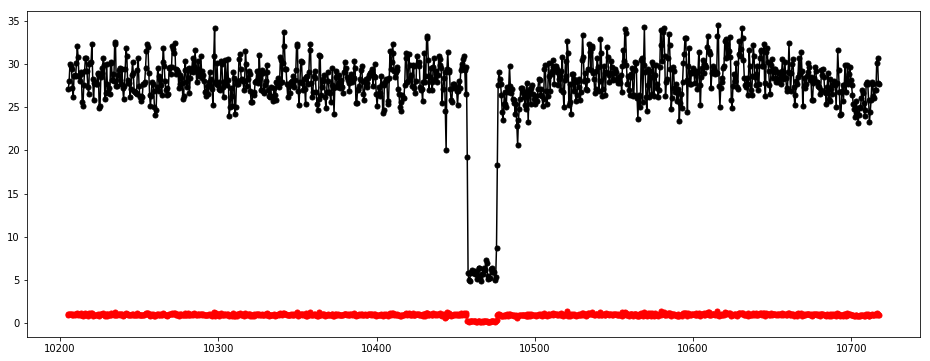

In [21]:
# para 2 pontos
c = (df[1].mean()/1000)**0.5 # sigma
print(c)
df[3] = df[1].rolling(window=2).mean() # media
df[4] = df[3]/0.035471250525172658
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=5) # original
plt.plot(df[0], df[4], 'ko-', color='black', markersize=5) # media deslizante
plt.show()

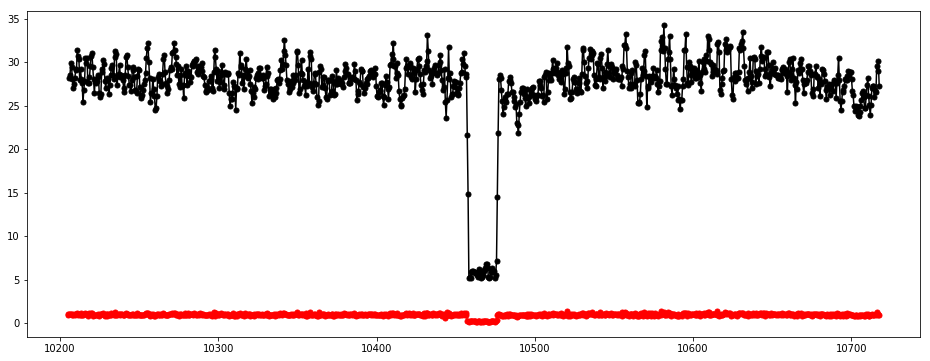

In [12]:
# para 3 pontos
df[2] = df[1].rolling(window=3).std(ddof=0) # sigma
df[3] = df[1].rolling(window=3).mean() # media
df[4] = df[3]/0.035471250525172658
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=5) # original
plt.plot(df[0], df[4], 'ko-', color='black', markersize=5) # media deslizante
plt.show()

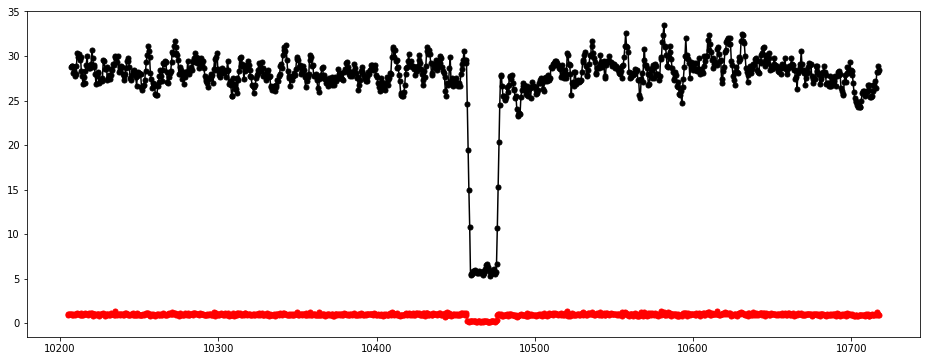

In [13]:
# para 5 pontos
df[2] = df[1].rolling(window=5).std(ddof=0) # sigma
df[3] = df[1].rolling(window=5).mean() # media
df[4] = df[3]/0.035471250525172658
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=5) # original
plt.plot(df[0], df[4], 'ko-', color='black', markersize=5) # media deslizante
plt.show()

# Aplicando a media deslizante no arquivo de saída do PRAIA photometry

Aplicando a media deslizante sobre as colunas de fluxo (8, 11, 14, 17) das estrelas calibradoras do arquivo ***photo_char_final_lightcurve.dat***

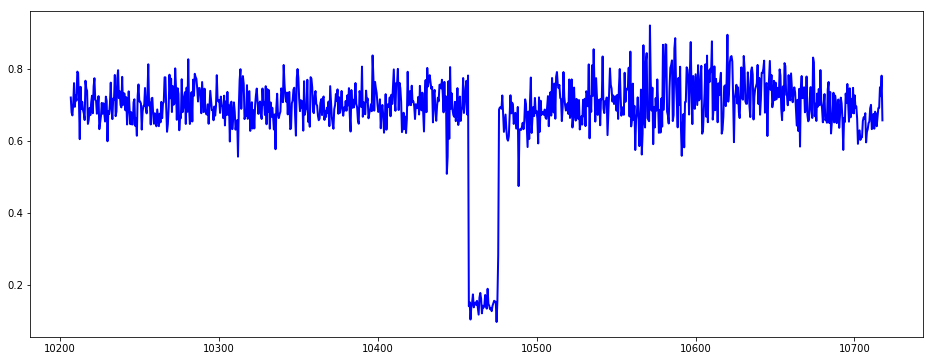

0               NaN
1               NaN
2               NaN
3               NaN
4      26488.229719
5      26281.120244
6      25565.215352
7      25398.251429
8      25870.685249
9      25933.709087
10     26112.492454
11     25981.312278
12     25905.520945
13     26625.012402
14     26637.799693
15     25874.281630
16     26062.724004
17     26783.696730
18     26606.956886
19     27067.905813
20     27739.474078
21     27837.057827
22     27287.100428
23     27210.983484
24     27076.675333
25     27409.117484
26     27088.790791
27     26676.739118
28     25700.381201
29     24631.437440
           ...     
970    27244.538601
971    27239.106344
972    26977.324214
973    26606.529542
974    26492.631221
975    26519.183988
976    27200.368263
977    27145.159037
978    27250.533723
979    27100.637675
980    27047.313955
981    26864.197904
982    26709.905522
983    26307.172403
984    26685.034129
985    26711.368178
986    26838.723326
987    27332.091890
988    28168.879853


In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
points = 5
df = pd.read_table("photo_char_final_lightcurve.dat", sep="\s+", header=None) # reading file photo_char_final_lightcurve.dat
# time in seconds
df[20] = (df[2] - 2457989.5) * 24 * 3600
# media deslizante sobre os promedio
df[21] = (df[7] + df[10] + df[13] + df[16])/4
df[22] = df[21].rolling(window=points).mean()
# media deslizante sobre as calibradoras
df[23] =  df[7].rolling(window=points).mean() 
df[24] = df[10].rolling(window=points).mean()
df[25] = df[13].rolling(window=points).mean()
df[26] = df[16].rolling(window=points).mean()
df[27] = (df[23] + df[24] + df[25] + df[26])/4
# plot 
# defining of size of plot
fig = plt.figure(figsize=(16, 6))
# Plotting
plt.plot(df[20], df[4]/df[22], 'b-', ms=2, lw=2.0) # rolling mean over calibrators star
#plt.plot(df[20], df[4]/df[27], 'g-', ms=2, lw=0.5, alpha=0.8) # rolling mean over each column and then average
#plt.plot(df[20], df[4]/df[21], 'r-', ms=2, lw=2.0, alpha=0.6) # original
plt.show()
df[22]

# Usando a formula dada pelo Julio

Só para fazer a comparação, emseguida se mostra os resultados com a formula fornecida pelo Julio

In [127]:
! awk 'BEGIN{size=5} {mod=NR%size; if(NR<=size){count++}else{sum-=array[mod]};sum+=(($8+$11+$14+$17)/4);array[mod]=(($8+$11+$14+$17)/4); print ($3-2457989.5)*24*3600, $5, ($8+$11+$14+$17)/4, sum/count}' photo_char_final_lightcurve.dat > teste.dat

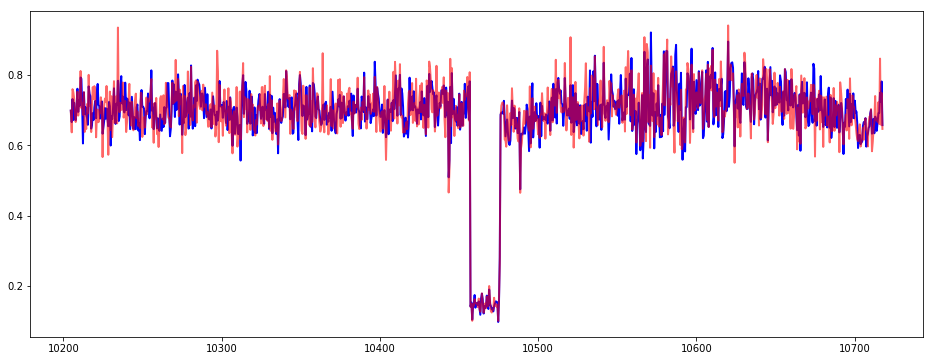

0      26772.8
1      28054.7
2      27545.7
3      26606.7
4      26488.2
5      26281.1
6      25565.2
7      25398.3
8      25870.7
9      25933.7
10     26112.5
11     25981.3
12     25905.5
13     26625.0
14     26637.8
15     25874.3
16     26062.7
17     26783.7
18     26607.0
19     27067.9
20     27739.5
21     27837.1
22     27287.1
23     27211.0
24     27076.7
25     27409.1
26     27088.8
27     26676.7
28     25700.4
29     24631.4
        ...   
970    27244.5
971    27239.1
972    26977.3
973    26606.5
974    26492.6
975    26519.2
976    27200.4
977    27145.2
978    27250.5
979    27100.6
980    27047.3
981    26864.2
982    26709.9
983    26307.2
984    26685.0
985    26711.4
986    26838.7
987    27332.1
988    28168.9
989    28152.3
990    27983.8
991    27745.7
992    27113.5
993    26534.1
994    26163.7
995    26581.5
996    25510.1
997    26157.6
998    26346.7
999    26787.4
Name: 3, Length: 1000, dtype: float64

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

teste = pd.read_table("teste.dat", sep="\s+", header=None)
fig = plt.figure(figsize=(16, 6))
plt.plot(teste[0], teste[1]/teste[3], 'b-', ms=5, lw=2.0) # media deslizante
plt.plot(teste[0], teste[1]/teste[2], 'r-', ms=2, lw=2.0, alpha=0.6) # original
plt.show()
teste[3]

# A continuação se mostra os resultados da fotometria utilizando a configuração do PRAIA_photometry.dat usado pelo Julio. 

O arquivo de fotometria depois de aplicar o ***PRAIA_photometry_22*** sobre o arquivo ***PRAIA_photometry_22.dat*** é ***photometry_Chariklo_2017Ago23.dat***

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [114]:
!awk 'BEGIN{size=15} {mod=NR%size; if(NR<=size){count++}else{sum-=array[mod]};sum+=(($8+$11+$14)/3);array[mod]=(($8+$11+$14)/3); print ($3-2457989.5)*24*3600, $5, ($8+$11+$14)/3, sum/count}' photometry_Chariklo_2017Ago23.dat > teste_julio_config.dat

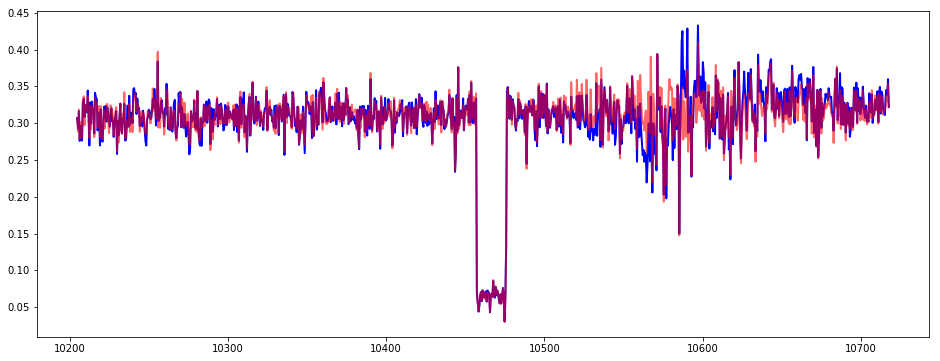

In [121]:
result = pd.read_table("teste_julio_config.dat", sep="\s+", header=None)
fig = plt.figure(figsize=(16, 6))
plt.plot(result[0], result[1]/result[3], 'b-', ms=2, lw=2.0) # media deslizante
plt.plot(result[0], result[1]/result[2], 'r-', ms=2, lw=2.0, alpha=0.6) # original
plt.show()